## Mapping data points

The code in this file is used to plot the company and station data.

**Basemap** was used to produce the outline of Manhattan and the surrounding areas.  Basemap uses matplotlib to plot geographical data.

For the plots used here to pick up the area surrounding Manhattan, it was assumed that the area was bounded by   
    Lattitude:  40.68$^{\circ}$ to 40.79$^{\circ}$   
    Longitude: -73.93$^{\circ}$ to -74.04$^{\circ}$  
    


In [3]:
# While loading the python extensions there weer significant problems with environment variables not being set.
# This Hack found on the web was able to set some of these variables so the code worked

# Hack to fix missing PROJ4 env var
import os
import conda
import random

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

FileNotFoundError: [Errno 2] No such file or directory: '/anaconda3/share/proj/epsg'

In [ ]:
# Function to read lat/lon for companies.  This file is also provided as a .py file in the repo.

def read_tech_companies():
    ''' Data frame of 10 tech companies
    return pd.DataFrame(tech_company_name, lattitude, longitude)
    '''
    companies = pd.read_csv("data/tech_companies.csv")
    companies.drop(['ADDRESS'], axis=1, inplace=True)
    
    return(companies)

In [ ]:
# Function to read lat/lon for companies.  This file is also provided as a .py file in the repo.

def read_mta_stations():
    ''' Read the MTA master list into a pd.DataFrame (Put the CSV file on the repository!!)
    data source = https://data.cityofnewyork.us/Transportation/Subway-Stations/arq3-7z49 (export data as csv)
    '''
    df = pd.read_csv("mta_stations.csv")
    df.rename(columns = {"OBJECTID": "key", "NAME":"name", "the_geom":"location"}, inplace = True)
    
    df["lon"] = df.location.str.split().str.get(1).str.strip('(')
    df["lat"] = df.location.str.split().str.get(2).str.strip(')')
    df = df[["key","name","LINE","lon","lat"]]
    df = df.sort_values(["name","LINE"], ascending = [True, True])
    
    return df
    
    '''
    return pd.DataFrame (columns = [station (unique), lattitude, longitude])
    '''

In [ ]:
# set the data up for companies
companies = read_tech_companies()

comp_lat = []
comp_lon = []
comp_labels = []
for index, row in companies.iterrows():
    comp_lat.append(row['LAT'])
    comp_lon.append(row['LON'])
    comp_labels.append(row['COMPANY'])

In [ ]:
# set the data up for the stations
#
# the station volume variable is fixed here and not pulled from any data.
# To force appropriate scaling, most stations have a volume of one and one station has a volume of 2.
# This forces most stations to have a circle which is 50% of the max size.

stations = read_mta_stations()

sta_lat = []
sta_lon = []
sta_vol = []

for index, row in stations.iterrows():
    sta_lat.append(float(row['lat']))
    sta_lon.append(float(row['lon']))
    sta_vol.append(1.)
    
sta_vol[200]=2

In [91]:
'''
Plots an outline of Manhattan with red dots on the stations and blue dots on the companies

pass the following variables

comp_lat      = list of lattitudes for companies
comp_lon      = list of lattitudes for companies
comp_labels   = list of labels for companies (not currently working)
sta_lat       = list of lattitudes for stations
sta_lon       = list of longitutes for stations

'''

def NYC_map(comp_lat,comp_lon,comp_labels,sta_lat,sta_lon,sta_vol):
    map = Basemap(projection='merc', lat_0 = 40, lon_0 = -74,
        resolution = 'h', area_thresh = 0.02,
        llcrnrlon=-74.04, llcrnrlat=40.68,
        urcrnrlon=-73.93, urcrnrlat=40.79)
    
# Make this plot larger.
    plt.figure(figsize=(16,12))

# draw the outlines of the map area and color in the land
    map.drawcoastlines()
    map.drawcountries()
    map.fillcontinents(color = 'yellowgreen')
    map.drawmapboundary()

#plot the station points in red - swap this with the next set of code
#    x_sta,y_sta = map(sta_lon, sta_lat)
#    map.plot(x_sta, y_sta, 'bo',color='r', markersize=7,label='Stations')

#plot the station points in red with circle varying by station volume
    x_sta,y_sta = map(sta_lon, sta_lat)
    max_dot_size = 25
    dot_factor = max_dot_size/max(sta_vol)
    
    for i in range(len(x_sta)):
        xpt = x_sta[i]
        ypt = y_sta[i]
        mark = int(sta_vol[i]*dot_factor)

#         
# swap the comment on the next two lines to change the symbol for the plot from a circle to a star
        plot_symbol = '*'     #star
#        plot_symbol = 'bo'   #cicle
        map.plot(xpt, ypt, plot_symbol, color='r', markersize=mark)

#plot the company points in blue
    x_comp,y_comp = map(comp_lon, comp_lat)
    map.plot(x_comp, y_comp, 'bo',color='b', markersize=7, label='Companies')

#create a legend and title
#    plt.legend(loc='lower right')
    title_string = "Companies & Stations in NYC"
#    plt.title(title_string)

# plot company labels - this didn't work (changed the scale of the map)
#    for label, xpt, ypt in zip(comp_labels, x_comp, y_comp):
#        plt.text(xpt, ypt, label)

#    plt.text(comp_labels[0],x_comp[0],y_comp[0])
    
    plt.show()
    return

The following code calls the above and plots the map

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1709: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1712: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


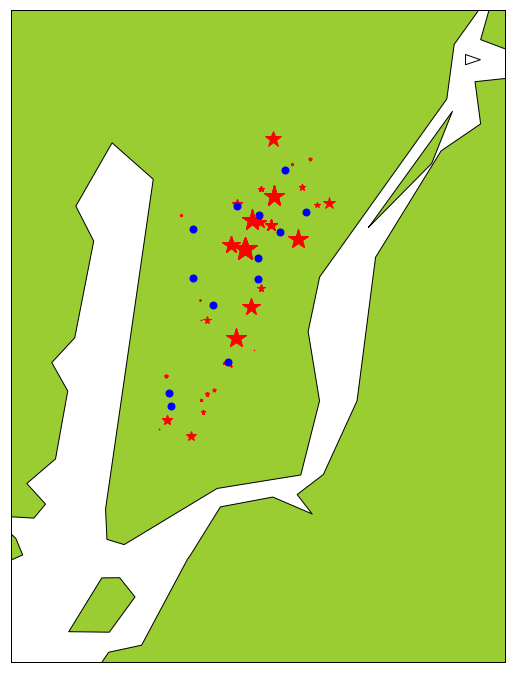

In [92]:
# read the station_companies.csv file for values to plot

stations1 = pd.read_csv("station_companies.csv")
#    df.rename(columns = {"OBJECTID": "key", "NAME":"name", "the_geom":"location"}, inplace = True)
    
#    df["lon"] = df.location.str.split().str.get(1).str.strip('(')
#    df["lat"] = df.location.str.split().str.get(2).str.strip(')')
#    df = df[["key","name","LINE","lon","lat"]]
#    df = df.sort_values(["name","LINE"], ascending = [True, True])
stations1.dropna(inplace=True)

sta_lat = []
sta_lon = []
sta_vol = []

for index, row in stations1.iterrows():
    sta_lat.append(float(row['lat']))
    sta_lon.append(float(row['lon']))
    sta_vol.append(float(row['max_entries']))
    
NYC_map(comp_lat,comp_lon,comp_labels,sta_lat,sta_lon,sta_vol)


/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1709: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1712: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


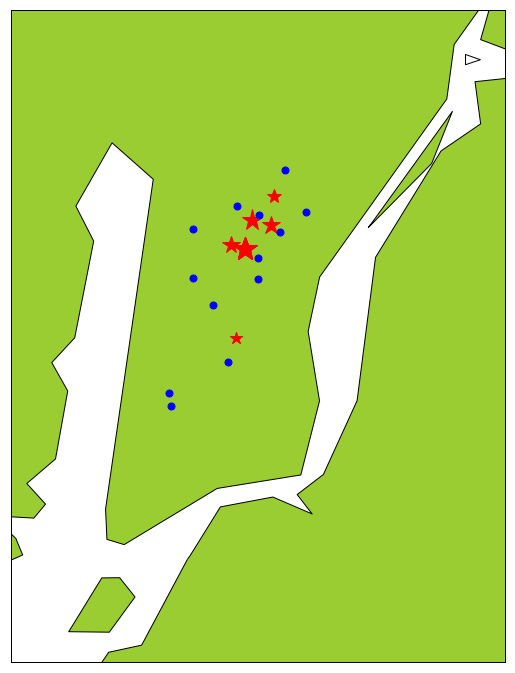

In [93]:
# read the station_companies.csv file for values to plot (work with a different data set)
stations1 = pd.read_csv("df_top.csv")
#    df.rename(columns = {"OBJECTID": "key", "NAME":"name", "the_geom":"location"}, inplace = True)
    
#    df["lon"] = df.location.str.split().str.get(1).str.strip('(')
#    df["lat"] = df.location.str.split().str.get(2).str.strip(')')
#    df = df[["key","name","LINE","lon","lat"]]
#    df = df.sort_values(["name","LINE"], ascending = [True, True])
stations1.dropna(inplace=True)

sta_lat = []
sta_lon = []
sta_vol = []

# use the station volume vaiable which sets the dot size to use the toucan_score instead
for index, row in stations1.iterrows():
    if row['toucan_score'] > 30000:
        sta_lat.append(float(row['lat']))
        sta_lon.append(float(row['lon']))
        sta_vol.append(float(row['toucan_score']))
    
NYC_map(comp_lat,comp_lon,comp_labels,sta_lat,sta_lon,sta_vol)